## Libraries

[Pandas](https://python-graph-gallery.com/pandas/) is a popular open-source Python library used for data manipulation and analysis. It provides data structures and functions that make working with structured data, such as tabular data (like `Excel` spreadsheets or `SQL` tables), easy and intuitive.

To install [Pandas](https://python-graph-gallery.com/pandas/), you can use the **following command** in your command-line interface (such as `Terminal` or `Command Prompt`):

`pip install pandas`

[Matplotlib](https://python-graph-gallery.com/matplotlib/) functionalities have been **integrated into the pandas** library, facilitating their use with `dataframes` and `series`. For this reason, you might also need to **import the [matplotlib](https://python-graph-gallery.com/matplotlib/) library** when building charts with [Pandas](https://python-graph-gallery.com/pandas/).

This also means that they use the **same functions**, and if you already know [Matplotlib](https://python-graph-gallery.com/matplotlib/), you'll have no trouble learning plots with [Pandas](https://python-graph-gallery.com/pandas/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In order to create graphics with [Pandas](https://python-graph-gallery.com/pandas/), we need to use **pandas objects**: `Dataframes` and `Series`. A dataframe can be seen as an `Excel` table, and a series as a `column` in that table. This means that we must **systematically** convert our data into a format used by pandas.

Since [histograms](https://python-graph-gallery.com/histogram/) need quantitative variables, we will create a dataset with 2 columns. The first column is called `"type"`, which stores the categories `"group1"` and `"group2"` repeated a total of 1000 times each.

The second column is named `"value"`. It holds numbers. The first 1000 numbers are random values from a normal distribution with an **average of 0** and a **standard deviation of 1**. The next 1000 numbers are random values from another normal distribution with an **average of 4** and a **standard deviation of 1**. We concatenate them into one single column thanks to the `concatenate()` function from numpy.

In [2]:
# Create 2 columns: one categorical and one numerical
sample_size = 1000
data = {
    'type': ['group1'] * sample_size + ['group2'] * sample_size,
    'value': np.concatenate([np.random.normal(0, 1, sample_size),
                             np.random.normal(4, 1, sample_size)])
}
df = pd.DataFrame(data)

## Basic histogram with 2 groups

Once we've opened our dataset, we'll now **create a simple [histogram](https://python-graph-gallery.com/histogram/)**, representing the distributions of the `'value'` variable **with the 2 groups**. We will iterate over all distinct value in the `'type'` variable and use the `hist()` function.

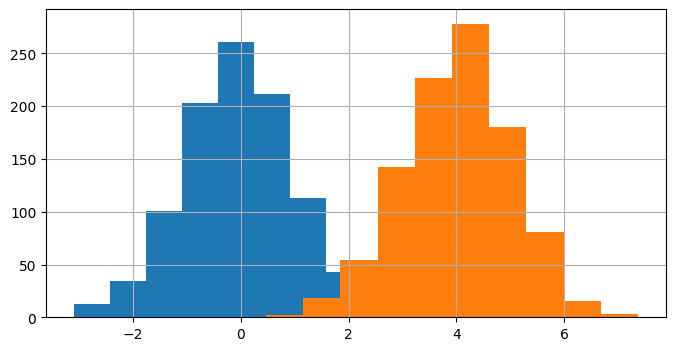

In [6]:
# Plot the histograms of each group
for group in df['type'].unique():
    
    # Filter the dataset on the group
    filtered_df = df[df['type']==group]
    
    # Add the histogram to the graphic
    filtered_df['value'].hist(figsize=(8, 4))

# Display the plot    
plt.show()

## Customize histogram with 2 groups

The above [histograms](https://python-graph-gallery.com/histogram/) can be easily customized with the following features
- change the `bins` argument to the **value we want**
- change the `color` argument to the **color we want**
- change the `edgecolor` argument to the **color we want**
- add a **title** and axis **label**
- add a **legend**

Our first step will be to get a **list of the labels** in the `type` variable and then define a **list of colors** of the same length as the first list.

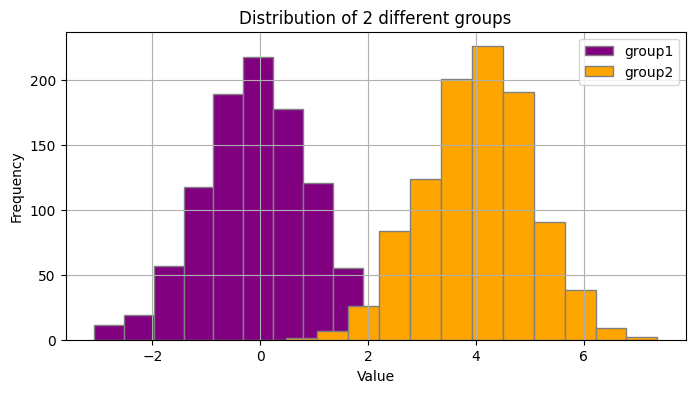

In [8]:
# Get group names and define colors
group_name = df['type'].unique()
colors = ['purple', 'orange']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = df[df['type']==group]['value'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of 2 different groups')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

## Histogram with small multiples

Now we will see how to create a **chart with small multiple** [histograms](https://python-graph-gallery.com/histogram/) that display the **distribution of several variables** at the same time. First we need a **dataset with more variables** with different distributions.

### Create the dataset
For this, we will use `numpy` **random functions** and **generate 9 different** numeric variables. **Don't worry** if this seems complicated to you: it's only useful for **generating fake data** and making the graphs readable!

In [13]:
# Number of data points
num_data_points = 1000

# Generate data for each distribution
normal_data = np.random.normal(loc=0, scale=1, size=num_data_points)
uniform_data = np.random.uniform(low=-1, high=1, size=num_data_points)
bimodal_data = np.concatenate((np.random.normal(loc=-2, scale=1, size=num_data_points // 2),
                               np.random.normal(loc=2, scale=1, size=num_data_points // 2)))
poisson_data = np.random.poisson(lam=5, size=num_data_points)
exponential_data = np.random.exponential(scale=2, size=num_data_points)
gamma_data = np.random.gamma(shape=2, scale=2, size=num_data_points)
beta_data = np.random.beta(a=2, b=5, size=num_data_points)
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=num_data_points)
triangular_data = np.random.triangular(left=-1, mode=0, right=1, size=num_data_points)

# Create a DataFrame
data = {
    'Normal': normal_data,
    'Uniform': uniform_data,
    'Bimodal': bimodal_data,
    'Poisson': poisson_data,
    'Exponential': exponential_data,
    'Gamma': gamma_data,
    'Beta': beta_data,
    'LogNormal': lognormal_data,
    'Triangular': triangular_data
}

df = pd.DataFrame(data)

### Create the chart

Now we can create a small multiple histograms with pandas and matplotlib:
- The following code goes through **each column of the dataframe** and creates a [histogram](https://python-graph-gallery.com/histogram/) plot
- For each subplot, the code adds a [histogram](https://python-graph-gallery.com/histogram/) of a specific column's data from the dataframe
- It adds a **title** and **axis label**
- The code **adjusts the layout** (thanks to the `tight_layout()` function) to make sure they fit well together in the figure
- Finally, it **displays the entire set of subplots** as a single plot

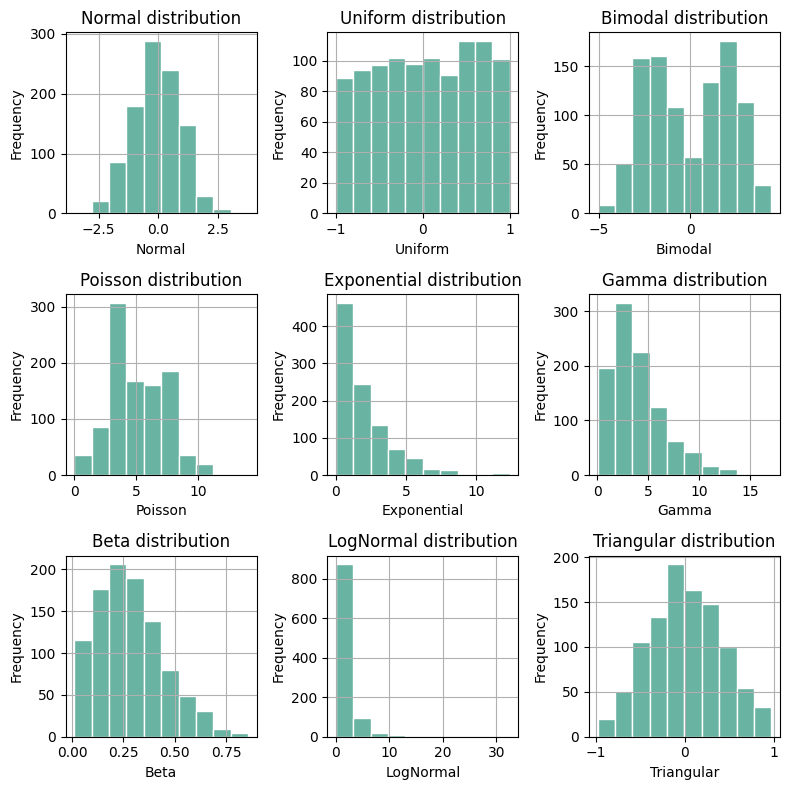

In [15]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df.columns):
    
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Going further

This post explains how to show the distribution of multiple groups and variables with [pandas](https://python-graph-gallery.com/pandas/).

For more examples of **how to create or customize** your plots with Pandas, see the [pandas section](https://python-graph-gallery.com/pandas/). You may also be interested in how to customize your histograms with [Matplotlib and Seaborn](https://python-graph-gallery.com/histogram/).